<a href="https://colab.research.google.com/github/juanfherrer/Optimizaci-n/blob/main/Kernel_Density_Estimation_(KDE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel Density Estimation (KDE)

KDE es una técnica para estimar la distribución de una variable continua sin asumir una forma específica (como normal o gaussiana).

Ventaja: útil cuando tus datos tienen una distribución desconocida o no normal.

<ipython-input-1-e91c6d059a90>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ingresos, shade=True)


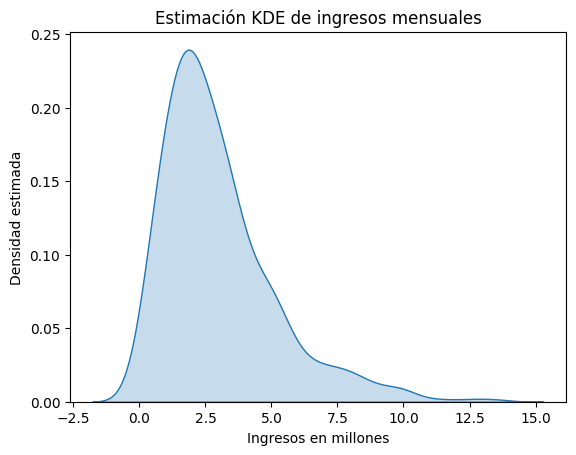

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Simulamos ingresos mensuales de microempresas
ingresos = np.random.gamma(shape=2, scale=1.5, size=500)

# KDE usando seaborn
sns.kdeplot(ingresos, shade=True)
plt.title("Estimación KDE de ingresos mensuales")
plt.xlabel("Ingresos en millones")
plt.ylabel("Densidad estimada")
plt.show()


Esto produce una curva suave que representa cómo se distribuyen los ingresos. Puedes comparar esta curva con diferentes grupos (e.g., por educación, ubicación, edad del negocio).

Distribución conjunta:
 Ingresos        Alto   Bajo  Medio
Educacion                         
Primaria       0.056  0.152  0.100
Secundaria     0.094  0.190  0.196
Universitaria  0.036  0.086  0.090

Distribución marginal de Educación:
 Educacion
Secundaria       0.480
Primaria         0.308
Universitaria    0.212
Name: proportion, dtype: float64

Distribución marginal de Ingresos:
 Ingresos
Bajo     0.428
Medio    0.386
Alto     0.186
Name: proportion, dtype: float64

Distribución condicional P(Ingresos | Educacion):
 Ingresos           Alto      Bajo     Medio
Educacion                                  
Primaria       0.181818  0.493506  0.324675
Secundaria     0.195833  0.395833  0.408333
Universitaria  0.169811  0.405660  0.424528


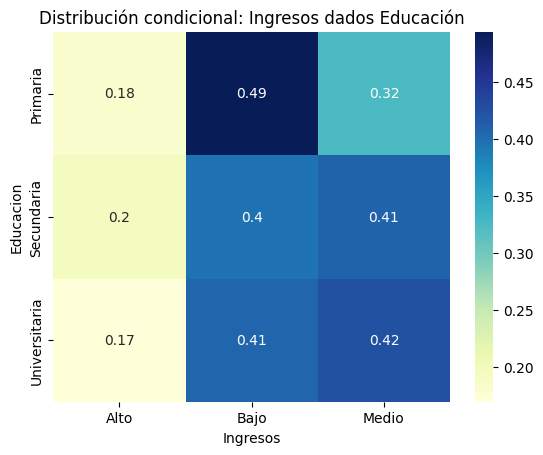

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Simulación de datos de microempresas
np.random.seed(42)
n = 500
data = pd.DataFrame({
    "Educacion": np.random.choice(["Primaria", "Secundaria", "Universitaria"], size=n, p=[0.3, 0.5, 0.2]),
    "Ingresos": np.random.choice(["Bajo", "Medio", "Alto"], size=n, p=[0.4, 0.4, 0.2])
})

# Distribución conjunta
tabla_conjunta = pd.crosstab(data['Educacion'], data['Ingresos'], normalize='all')
print("Distribución conjunta:\n", tabla_conjunta)

# Distribución marginal
print("\nDistribución marginal de Educación:\n", data['Educacion'].value_counts(normalize=True))
print("\nDistribución marginal de Ingresos:\n", data['Ingresos'].value_counts(normalize=True))

# Distribución condicional: P(Ingresos | Educacion)
condicional = pd.crosstab(data['Educacion'], data['Ingresos'], normalize='index')
print("\nDistribución condicional P(Ingresos | Educacion):\n", condicional)

# Visualización
sns.heatmap(condicional, annot=True, cmap="YlGnBu")
plt.title("Distribución condicional: Ingresos dados Educación")
plt.show()


Aplicaciones reales en tus proyectos:
Transformación agroindustrial: evaluar si el acceso a tecnología (X) influye en el rendimiento de la finca (Y).

Microempresas del Quindío: evaluar si el tipo de formación técnica (X) se asocia con ingresos anuales (Y).

Chatbots educativos: analizar si el tipo de interacción (texto vs voz) afecta la retención del aprendizaje.